#异常检测

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#训练数据
df=pd.read_excel('data1.xlsx',sheet_name='X',header=None)
df.head()

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


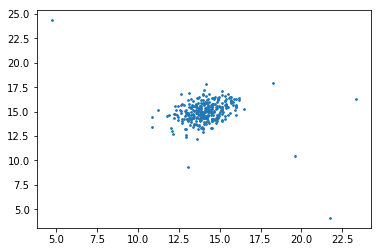

In [3]:
#可视化数据
plt.figure()
plt.scatter(df[0],df[1],s=3)
plt.show();

In [4]:
#训练数据量
m=len(df)
m

307

In [5]:
#求均值
s=np.sum(df,axis=0)
mu=s/m
mu

0    14.112226
1    14.997711
dtype: float64

In [6]:
#求方差
vr=np.sum((df-mu)**2,axis=0)
variance=vr/m
variance

0    1.832631
1    1.709745
dtype: float64

In [7]:
#将variance转换成对角矩阵
var_dia=np.diag(variance)
var_dia

array([[1.83263141, 0.        ],
       [0.        , 1.70974533]])

In [8]:
#训练数据，计算概率值p
k=len(mu)
print('k=',k)
X=df-mu  #[307 rows x 2 columns],  0   -1.065411  -0.256558     1   -0.703706  -1.234441
p = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
p[:5]

k= 2


0    0.064708
1    0.050304
2    0.072450
3    0.050316
4    0.063685
dtype: float64

In [9]:
#测试数据
cvx=pd.read_excel('data1.xlsx',sheet_name='Xval',header=None)
cvx.head()

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


In [10]:
#标签
cvy=pd.read_excel('data1.xlsx',sheetname='y',header=None)
cvy.head()

,0
0,0
1,0
2,0
3,0
4,0


In [11]:
#把cvy转换成numpy数组
y=np.array(cvy)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [12]:
#统计分析概率值p
print('p.mean=',p.mean())
p.describe()

p.mean= 0.05905331440153435


count    3.070000e+02
mean     5.905331e-02
std      2.324461e-02
min      1.181209e-23
25%      4.361075e-02
50%      6.510144e-02
75%      7.849532e-02
max      8.986095e-02
dtype: float64

In [13]:
#计算tp(真正例)\fp(假正例)\fn(假反例)
def tp_fp_fn(ep):
    tp,fp,fn=0,0,0
    for i in range(len(y)):
        if p[i]<=ep and y[i][0]==1:
            tp+=1
        elif p[i]<=ep and y[i][0]==0:
            fp+=1
        elif p[i]>ep and y[i][0]==1:
            fn+=1
    return tp,fp,fn            

In [14]:
eps=[i for i in p if i<=p.mean()]
print(len(eps))
print(eps[:3])

133
[0.050304169732524696, 0.05031574506140904, 0.04245832275957984]


In [15]:
#计算f1-score
def f1(ep):
    tp,fp,fn=tp_fp_fn(ep)
    prec=tp/(tp+fp)
    rec=tp/(tp+fn)
    f1=(2*prec*rec)/(prec+rec)
    return f1

In [16]:
f=[]
for i in eps:
    f.append(f1(i))
    
print(len(f),'\n',f[:3])

133 
 [0.14285714285714285, 0.14035087719298248, 0.1927710843373494]


In [17]:
#f分数值最大值的索引
np.array(f).argmax()

131

In [18]:
e=eps[131]
e

6.107184445968581e-05

In [19]:
label = []
for i in range(len(df)):
    if p[i] <= e:
        label.append(1)
    else:
        label.append(0)
label[:5]

[0, 0, 0, 0, 0]

In [20]:
df['label'] = np.array(label)
print(df.head())

           0          1  label
0  13.046815  14.741152      0
1  13.408520  13.763270      0
2  14.195915  15.853181      0
3  14.914701  16.174260      0
4  13.576700  14.042849      0


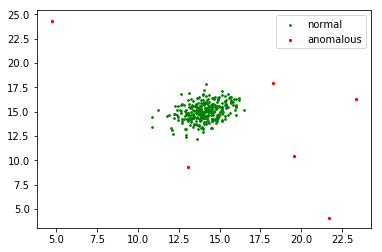

In [21]:
#可视化检测结果
df2=[]
df3=[]
da=np.array(df)
for i in range(len(df)):
    if da[i][2]==0:
        df2.append(da[i][:2])
    else:
        df3.append(da[i][:2])


df2=pd.DataFrame(df2)
df3=pd.DataFrame(df3)
plt.scatter(df2[0],df2[1],color='green',s=3,label='normal')
plt.scatter(df3[0],df3[1],color='red',s=5,label='anomalous')
plt.legend(loc='best')
plt.show()